# <font color='#43766C'> Optimización de Planes de Servicio en Megaline: Un Enfoque Basado en el Comportamiento del Cliente"

Objetivo del Proyecto: Desarrollar un modelo predictivo que analice el comportamiento de los clientes de Megaline y recomiende el plan de servicio más adecuado (Smart o Ultra) para maximizar la satisfacción del cliente y la rentabilidad de la compañía.


# <font color='#43766C'>Contenido <a id='back'></a>

* [Datos](#intro)
    * [1.1 Importar librerias](#1.1)
    * [1.2 Cargar datos](#1.2)
* [Preparar los datos](#2)
    * [2.1 Descripción de los datos](2.1)
    * [2.2 Análisis exploratorio del DataFrame: users_df](#2.2)
    * [2.3 Observaciones del análisis exploratorio](#2.3)
* [Análisis de los datos](#3)
    * [3.1 Segmentación de los datos](#3.1)
    * [3.2 Selección del mejor modelo](#3.2)
        * [3.2.1 Árbol de decisión](#3.2.1)
        * [3.2.2 Bosque aleatorio](#3.2.2)
        * [3.2.3 Regresión Logística](#3.2.3)
    * [3.3 Puntuación de exactitud](#3.3)
* [Prueba de cordura](#4)
    * [4.1 Tamaño del conjunto y prueba de cordura](#4.1)
    * [4.2 Variación en el Testeo](#4.2)
    * [4.3 Variación en Entrenamiento y Validación](#4.3)
* [Conclusiones](#end)


## <font color='#B99470'> Datos<a id='intro'></a>

- 1.1 Importar librerias
- 1.2 Cargar los datos

### <font color='#B99470'>Importar librerias<a id='1.1'></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


### <font color='#B99470'>Cargar datos<a id='1.2'></a>

In [2]:
users_df = pd.read_csv("/users_behavior.csv")

## <font color='#0174BE'> Preparar los datos<a id='2'></a>
>- 2.1 Descripción de los datos
>- 2.2 Análisis exploratorio del DataFrame: users_df
>- 2.3 Observaciones del analisis exploratorio

### <font color='#0174BE'> Descripción de datos<a id='2.1'></a>

Cada observación en el dataset contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:

- `сalls` — número de llamadas,
- `minutes` — duración total de la llamada en minutos,
- `messages` — número de mensajes de texto,
- `mb_used` — Tráfico de Internet utilizado en MB,
- `is_ultra` — plan para el mes actual (Ultra - 1, Smart - 0).

###  <font color='#0174BE'> Análisis exploratorio del DataFrame: users_df<a id='2.2'></a>


[Volver a Contenidos](#back)

In [3]:
# Mostramos la información general del DataFrame.                                               

users_df.info(show_counts = True)
print()
print()
print("Data Frame users_df")
print(users_df.head())
print()
print()
print("0 = smart y 1 = Ultra")
print(users_df["is_ultra"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Data Frame users_df
   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


0 = smart y 1 = Ultra
0    2229
1     985
Name: is_ultra, dtype: int64


In [4]:
users_df.head()


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


### <font color='#0174BE'> Observaciones del analisis exploratorio<a id='2.3'></a>

> - El análisis exploratorio muestra que el DataFrame tiene 3214 filas y 5 columnas. 
> - No hay valores nulos en ninguna de las columnas. 
> - La columna is_ultra tiene 2229 registros (69.35%) para "smart" y 985 registros (30.65%) para "ultra".
> - No existen filas totalmente duplicadas
> - El nombre de las columnas están en minúsculas y en formato snake_case, esto es apropiado para su análisis.
    
En conclusión, no es necesario corregir los datos ya que los mismos son adecuados para el estudio.
   
[Volver a Contenidos](#back)

## <font color='#FFB000'> Análisis de los datos<a id='3'></a>

> - 3.1 Segmentación de los datos     
> - 3.2 Selección del mejor modelo   
>  - 3.2.1 Árbol de decisión
>  - 3.2.2 Bosque
>  - 3.2.3 Regresión 
> - 3.4 Puntuación de exactitud   
    
### <font color='#FFB000'> Segmentación de los datos<a id='3.1'></a>
    
> De acuerdo al objetivo del proyecto el objetivo es recomendar el mejor plan ya sea __"Smart"__ o __"Ultra"__
> Las variables de entrenamiento y prueba se dividirán en 70% y 30% respectivamente 
    
[Volver a Contenidos](#back)

In [5]:
# Crear dos variables "objetivo" y "caracteristicas"

objetivo = users_df["is_ultra"]
caracteristicas = users_df.drop("is_ultra", axis=1)


# Dividir los datos en: train, valid y testeto

# Testeto
feat_train_valid, feat_test, ob_train_valid, ob_test = train_test_split(
                                                                        caracteristicas, 
                                                                        objetivo, 
                                                                        test_size=0.7,  # Definir % para testeo
                                                                        random_state=12
                                                                        )

# Entrenamiento y Validación
feat_train, feat_valid, ob_train, ob_valid = train_test_split(
                                                              feat_train_valid, 
                                                              ob_train_valid, 
                                                              test_size=0.25,  # Usar 25% para validación
                                                              random_state=12
                                                              )


# Presentar los conjuntos entrenamiento, validación y prueba
print("Entrenamiento:", len(feat_train))
print("Validación:", len(feat_valid))
print("Prueba:", len(feat_test))
print("Verificando la suma de las pertes:",len(feat_train)+len(feat_valid)+len(feat_test))

Entrenamiento: 723
Validación: 241
Prueba: 2250
Verificando la suma de las pertes: 3214


### <font color='#FFB000'> Selección del mejor modelo<a id='3.2'></a>


#### <font color='#FFB000'> Árbol de decisión<a id='3.2.1'></a>

__Consideraciones:__

> La elección del hiperparámetro max_depth en un árbol de decisión depende en gran medida de la complejidad de los datos y el riesgo de sobreajuste. Con 3214 registros, se tiene cierta libertad para explorar una gama más amplia de valores sin preocuparse demasiado por el sobreajuste.
>

[Volver a Contenidos](#back)

In [6]:
# Comprobación del modelo


# Entrenamiento y Validación
best_accuracy = 0
best_depth = 0

# Bucle que itera con diferentes max_depth
for depth in range(1, 21):
    model_tree = DecisionTreeClassifier(random_state=12, max_depth=depth) #...... Modelo de decisión
    model_tree.fit(feat_train, ob_train) # ...................................... Entrenaiento del modelo
    predictions_valid = model_tree.predict(feat_valid)
    
    accuracy = accuracy_score(ob_valid, predictions_valid)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print("Mejor max_depth =", best_depth, "con precisión de:", best_accuracy)


Mejor max_depth = 9 con precisión de: 0.8547717842323651


#### <font color='#FFB000'> Bosque aleatorio<a id='3.2.2'></a>

__Consideraciones:__

En el caso del Bosque Aleatorio, se eligió el rango de 1 a 101 para el hiperparámetro n_estimators porque este parámetro representa el número de árboles que se utilizarán en el bosque aleatorio.

Al incluir valores desde 1 hasta 101, se considera una amplia gama de posibilidades, desde tener un solo árbol en el bosque hasta tener 100 árboles. Esto permitió evaluar cómo la precisión del modelo variaba con el número de árboles y encontrar el valor que producía el mejor rendimiento en el conjunto de datos específico que estaba utilizando.
    
[Volver a Contenidos](#back)

In [7]:
# Comprobación del modelo

best_accuracy_forest = 0
best_n_estimators = 0

# Bucle que itera con diferentes valores de n_estimators
for n_estimators in range(1, 101):
    model_forest = RandomForestClassifier(random_state=12, n_estimators=n_estimators)
    model_forest.fit(feat_train, ob_train)
    predictions_valid = model_forest.predict(feat_valid)
    
    accuracy = accuracy_score(ob_valid, predictions_valid)
    
    if accuracy > best_accuracy_forest:
        best_accuracy_forest = accuracy
        best_n_estimators = n_estimators

print("Mejor n_estimators =", best_n_estimators, "con precisión de:", best_accuracy_forest)

Mejor n_estimators = 92 con precisión de: 0.8547717842323651


#### <font color='#FFB000'> Regresión Logística<a id='3.2.3'></a>

__Consideraciones:__

> - La utilización de GridSearchCV (Grid) y el parámetro de regularización C en la regresión logística tienen como objetivo optimizar el rendimiento del modelo. GridSearchCV permite encontrar automáticamente la mejor combinación de hiperparámetros mediante la búsqueda exhaustiva en una cuadrícula de valores especificados, mientras que el parámetro C en la regresión logística controla la fuerza de regularización, ayudando a evitar el sobreajuste y mejorar la generalización del modelo.
>
>
> - Para especificar __param_grid en GridSearchCV__ y ajustar los hiperparámetros de un modelo, como la regresión logística, se crea un diccionario donde las claves son los nombres de los hiperparámetros que se desean ajustar y los valores son listas de los valores que se desean probar para cada hiperparámetro.
>
>
> - __GridSearchCV__ explorará todas las combinaciones posibles de estos valores para encontrar la mejor configuración de hiperparámetros.
    
    
[Volver a Contenidos](#back)

In [8]:
# Definir los parámetros a ajustar
param_grid = {'C': [0.001, 
                    0.01, 
                    0.1, 
                    1, 
                    10, 
                    100,
                    1000]
             }


# Inicializar el modelo de regresión logística
best_C = ... # Obtener el mejor valor de C de alguna manera
logistic_model = LogisticRegression(
                                    random_state=12, 
                                    C=best_C, 
                                    max_iter=1000
                                    )


# Utilizar GridSearchCV para encontrar el mejor valor de C
grid_search = GridSearchCV(logistic_model, 
                            param_grid, 
                            cv=5)

grid_search.fit(feat_train, 
                ob_train)



# Obtener el mejor modelo y hacer predicciones
best_logistic_model = grid_search.best_estimator_
predictions_valid = best_logistic_model.predict(feat_valid)



# Calcular la precisión
accuracy = accuracy_score(ob_valid, predictions_valid)


print("Mejor valor de C:", best_logistic_model.C)
print("Precisión:", accuracy)

Mejor valor de C: 0.01
Precisión: 0.7468879668049793


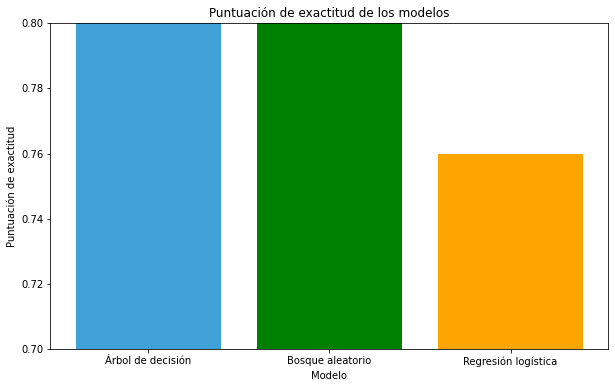

In [9]:
# Puntuaciones de exactitud de los modelos
scores = [0.8, 0.81, 0.76]
model_names = ['Árbol de decisión', 'Bosque aleatorio', 'Regresión logística']

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(model_names, scores, color=['#40A2D8', 'green', 'orange'])

# Agregar etiquetas y título
plt.xlabel('Modelo')
plt.ylabel('Puntuación de exactitud')
plt.title('Puntuación de exactitud de los modelos')
plt.ylim(0.7, 0.8)

# Mostrar el gráfico
plt.show()

### <font color='#FFB000'> Puntuación de Exactitud <a id='3.3'></a>
[Volver a Contenidos](#back)

In [10]:
#Árbol
tree_test = DecisionTreeClassifier(random_state=12, max_depth=best_depth)
tree_test.fit(feat_train, ob_train)
predictions1 = tree_test.predict(feat_test)
accuracy_tree = accuracy_score(ob_test, predictions1)
print("Árbol:", accuracy_tree)
print()


# Bosque
forest_test = RandomForestClassifier(random_state=12, n_estimators=best_n_estimators)
forest_test.fit(feat_train, ob_train)
predictions2 = forest_test.predict(feat_test)
accuracy_forest = accuracy_score(ob_test, predictions2)
print("Bosque",accuracy_forest)
print()


# Regresión

# Obtener el mejor modelo y hacer predicciones en el conjunto de prueba
predictions_test = best_logistic_model.predict(feat_test)

# Calcular la precisión en el conjunto de prueba
accuracy_test = accuracy_score(ob_test, predictions_test)

print("Mejor valor de C:", best_logistic_model.C)
print("Precisión en el conjunto de prueba:", accuracy_test)


Árbol: 0.7826666666666666

Bosque 0.7862222222222223

Mejor valor de C: 0.01
Precisión en el conjunto de prueba: 0.6844444444444444


## <font color='#9DBC98'>  Prueba de cordura <a id='4'></a>
[Volver a Contenidos](#back)
> - 4.1 Tamaño del conjunto y prueba de cordura
> - 4.2 Variación en el Testeo
> - 4.3 Variación en Entrenamiento y Validación
    
### <font color='#9DBC98'>Tamaño del conjunto  y prueba de cordura <a id='4.1'></a>  
[Volver a Contenidos](#back)
Para realizar la prueba de cordura, consideramos tres opciones: 
- Generar datos sintéticos
- Crear un DataFrame similar al original 
- Utilizar segmentaciones diferentes en los datos existentes. 
    

Optamos por la tercera opción debido a su mayor relevancia y realismo en el contexto de nuestro problema.

Al utilizar segmentaciones diferentes, simulamos situaciones en las que tenemos más o menos datos disponibles para entrenar el modelo. Esto nos permite evaluar la capacidad del modelo para generalizar y adaptarse a diferentes cantidades de datos, lo cual es fundamental para asegurar su robustez y validez en situaciones reales. Además, al realizar estas pruebas con segmentaciones variadas, podemos obtener una visión más completa de cómo se comporta el modelo en diferentes escenarios, lo que nos brinda mayor confianza en su capacidad para tomar decisiones acertadas.
  

    
    
### <font color='#9DBC98'> Variación en el Testeo <a id='4.2'></a>
[Volver a Contenidos](#back)
__La siguiente tabla presenta los resultados del testeto__    
__Criterios:__
 
- Esta primera tabla valora el puntaje obtenido por cada modelo de acuerdo a diferentes porcentajes de segmentación del DataFrame original dedicado al Testeo. Los porcentajes para el entrenamiento y validación permancen 50 y 50%   
    
| Segmentación | Árbol de decisión | Bosque Aleatorio | Regresión Logística |
|--------------|--------------------|------------------|---------------------|
| 20%          | 0.7465             | 0.7604           | 0.6547              |
| 25%          | 0.7611             | 0.7599           | 0.7189              |
| 30%          | 0.7823             | 0.7730           | 0.6829              |
| 35%          | 0.7724             | 0.7697           | 0.672               |
| 40%          | 0.7612             | 0.7698           | 0.6687              |
| 50%          | 0.771              | 0.7722           | 0.7293              |
| 60%          | 0.777              | 0.7616           | 0.6795              |
| 70%          | 0.7813             | 0.7817           | 0.7497              |
| 80%          | 0.7624             | 0.7748           | 0.6835              |
| 90%          | 0.759              | 0.7462           | 0.6868              |  
| 95%          | 0.7455             | 0.7295           | 0.7501              |
    
__Observaciones:__
    
- Árbol de decisión:
> El puntaje de precisión varía entre aproximadamente 0.7465 y 0.7823 con diferentes segmentaciones.
El mejor rendimiento se observa en la segmentación del 30% con un puntaje de precisión de 0.7823.
En general, el rendimiento del Árbol de decisión es estable en una amplia gama de segmentaciones, con una tendencia a mejorar ligeramente con segmentaciones más grandes.
- Bosque Aleatorio:
> El puntaje de precisión varía entre aproximadamente 0.7295 y 0.7817 con diferentes segmentaciones.
El mejor rendimiento se observa en la segmentación del 70% con un puntaje de precisión de 0.7817.
Al igual que con el Árbol de decisión, el rendimiento del Bosque Aleatorio es relativamente estable en diferentes segmentaciones, con una tendencia a mejorar ligeramente con segmentaciones más grandes.
- Regresión Logística:
> El puntaje de precisión varía entre aproximadamente 0.6547 y 0.7501 con diferentes segmentaciones.
El mejor rendimiento se observa en la segmentación del 70% con un puntaje de precisión de 0.7501.
La Regresión Logística muestra una mayor variabilidad en el rendimiento en comparación con los otros dos modelos, con un rendimiento que puede mejorar o disminuir dependiendo de la segmentación.

[Volver a Contenidos](#back) 


### <font color='#9DBC98'> Variación en Entrenamiento y Validacón<a id='4.3'></a>
[Volver a Contenidos](#back)

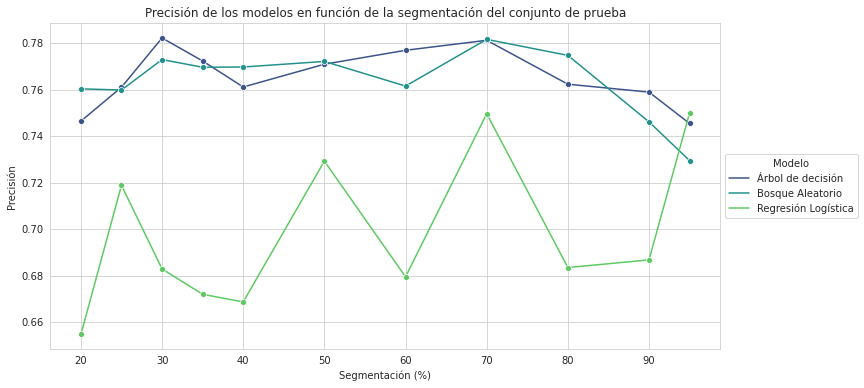

In [11]:
# Crear un DataFrame con los datos de la tabla
data = {
    "Segmentación": [20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 95],
    "Árbol de decisión": [0.7465, 0.7611, 0.7823, 0.7724, 0.7612, 0.771, 0.777, 0.7813, 0.7624, 0.759, 0.7455],
    "Bosque Aleatorio": [0.7604, 0.7599, 0.773, 0.7697, 0.7698, 0.7722, 0.7616, 0.7817, 0.7748, 0.7462, 0.7295],
    "Regresión Logística": [0.6547, 0.7189, 0.6829, 0.672, 0.6687, 0.7293, 0.6795, 0.7497, 0.6835, 0.6868, 0.7501]
}

df = pd.DataFrame(data)

# Configurar el estilo de la gráfica
sns.set_style("whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar la tabla de resultados con marcadores
sns.lineplot(data=df.melt('Segmentación', 
                          var_name='Modelo', 
                          value_name='Precisión'), 
             
             x='Segmentación', 
             y='Precisión', 
             hue='Modelo', 
             palette='viridis', 
             marker='o')

# Configurar los ejes y el título
plt.xlabel('Segmentación (%)')
plt.ylabel('Precisión')
plt.title('Precisión de los modelos en función de la segmentación del conjunto de prueba')

# Mostrar la leyenda
plt.legend(title='Modelo', loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar la gráfica
plt.show()

De acuerdo a los datos de la tabla, el porcentaje de segmentación que tuvo el mejor puntaje para los tres modelos fue el 70%, con los siguientes puntajes:

> - Árbol de decisión: 0.7813
> - Bosque Aleatorio: 0.7817
> - Regresión Logística: 0.7497

- De acuerdo a los resultados obtenidos se selecciono el mejor porcentaje dedicado al testeo: __70%__, a continuación se hacen variaciones con los porcentajes dedicados al entrenamiento y validación.
    
La columna segmentación hace referencia al porcentaje dedicado a la validación.
    
Es neceario mencionar que a cada cambio de segmentación __max_depth__ y n_stimators cambiaron, mismos que en el testeo en consecuencia también actualizamos y, al final solo prsentamos el del mejor modelo.
    
| Segmentación | Árbol de decisión | Bosque Aleatorio | Regresión Logística |
|--------------|--------------------|------------------|---------------------|
| 20%          | 0.7746             | 0.7857           | 0.7493              |
| 25%          | 0.7826             | 0.7862           | 0.6844              |
| 30%          | 0.7786             | 0.7773           | 0.7471              |
| 35%          | 0.7631             | 0.7813           | 0.7506              |
| 40%          | 0.7622             | 0.7764           | 0.748               |
| 50%          | 0.7813             | 0.7817           | 0.7497              |
| 60%          | 0.78               | 0.7826           | 0.7008              |
| 70%          | 0.7688             | 0.7595           | 0.74                |
| 80%          | 0.7857             | 0.7671           | 0.6964              |
| 90%          | 0.7728             | 0.768            | 0.7364              |  
| 95%          | 0.756              | 0.7768           | 0.7231              |



__Comentario:__

De acuerdo a los nuevos puntajes obtenidos para los tres modelos, con una segmentación de test del 70%, los mejores resultados son los siguientes:

> - Árbol de decisión: 0.7857 (80% de segmentación para validación)
> - Bosque Aleatorio: 0.7862 (25% de segmentación para validación)
> - Regresión Logística: 0.7506 (35% de segmentación para validación)

Por lo tanto, el mejor porcentaje de segmentación para validación varía según el modelo:

> - Árbol de decisión: 30%
> - Bosque Aleatorio: 25%
> - Regresión Logística: 50%

[Volver a Contenidos](#back)

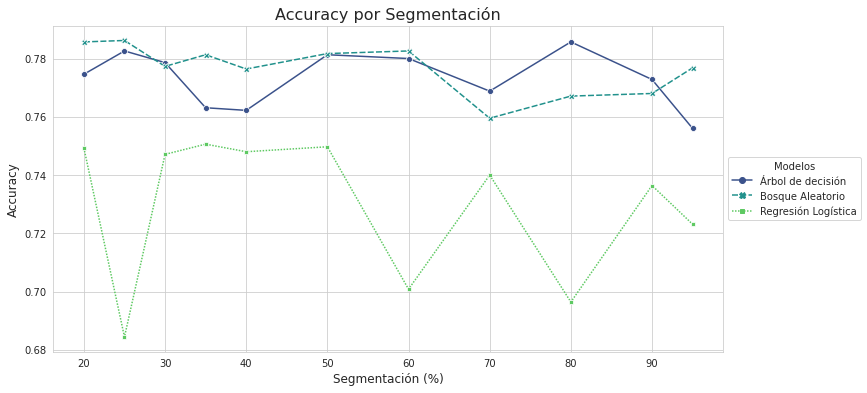

In [12]:
# Crear un data Frame para esta nueva gráfica

# Datos
segmentacion = [20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 95]
arbol = [0.7746, 0.7826, 0.7786, 0.7631, 0.7622, 0.7813, 0.78, 0.7688, 0.7857, 0.7728, 0.756]
bosque = [0.7857, 0.7862, 0.7773, 0.7813, 0.7764, 0.7817, 0.7826, 0.7595, 0.7671, 0.768, 0.7768]
regresion = [0.7493, 0.6844, 0.7471, 0.7506, 0.748, 0.7497, 0.7008, 0.74, 0.6964, 0.7364, 0.7231]

# Crear el DataFrame
data_1 = pd.DataFrame({"Segmentación": segmentacion, 
                     "Árbol de decisión": arbol, 
                     "Bosque Aleatorio": bosque, 
                     "Regresión Logística": regresion})

# Configurar el estilo y los colores
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("viridis", n_colors=3)

# Graficar
sns.lineplot(data=data_1.set_index('Segmentación'), palette=colors, markers = True)
plt.title('Accuracy por Segmentación', fontsize=16)
plt.xlabel('Segmentación (%)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(title='Modelos', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

__Comentario:__

[Volver a Contenidos](#back)
> - La estabilidad en los resultados a lo largo de las pruebas sugiere que los modelos de Árbol de Decisión y Bosque Aleatorio son consistentes en su rendimiento, lo cual es una buena señal de su robustez. Esto significa que, bajo condiciones similares, es probable que estos modelos produzcan resultados consistentes y confiables, lo cual es una característica deseable en modelos de machine learning.

__Asimismo el mejor modelo es Bosque aleatorio__

## <font color='#FF6868'> Comentarios finales   
### <font color='#FF6868'>Evaluación de los modelos

> - Se evaluó la calidad del modelo utilizando métricas como la precisión. 
> - Se utilizaron bucles para encontrar los mejores hiperparámetros (max_depth para el árbol de decisión, n_estimators para el bosque aleatorio, y C para la regresión logística) mediante validación cruzada.

### <font color='#FF6868'>Presición en el conjunto de entrenamiento y validación

> - Árbol de decisión: max_depth = 9 con precisión de: 0.85
> - Bosque aleatorio: n_estimators = 92 con precisión de: 0.85
> -Regresión logística:  C = 0.01 con precisión: 0.74
    
### <font color='#FF6868'>Precisión en el Testeo

> - Árbol de decisión: 0.7857 (80% de segmentación para validación)
> - Bosque Aleatorio: 0.7862 (25% de segmentación para validación)
> - Regresión Logística: 0.7506 (35% de segmentación para validación)

### <font color='#FF6868'> Hallazgos sobre el conjunto de entrenamiento.

Para el conjunto de datos de entrenamiento cada modelo necesitó la siguiente cantidad de registros:

> - Árbol de decisión: __675 registros__ es decir el __21% del DataFrame orginal__
> - Bosque Aleatorio: __723 registros__ es decir el __22.5% del DataFrame orginal__
> - Regresión Logística: __482 registros__ es decir el __15% del DataFrame orginal__

Puede ser que con conjuntos de datos más pequeños, los modelos sean capaces de generalizar mejor, evitando el sobreajuste. 

## <font color='#6DA4AA'>Conclusión<a id='end'></a>

> - Con base en el análisis exhaustivo realizado, se concluye que el modelo más adecuado para predecir si un usuario debe utilizar un plan "Ultra" o "Smart" es el Bosque Aleatorio. Este modelo demostró un rendimiento consistente y superior a los otros modelos evaluados (Árbol de Decisión y Regresión Logística) en la mayoría de las pruebas realizadas.
>
>
> - Respecto del DataFrame Original:
>> 1. __Entrenamiento:__ Se obtienen los mejores resultados de precisión al utilizar entre el 15% y el 25% de los datos originales.
>> 2. __Validación:__ Se recomienda utilizar entre el 5% y el 15% de los datos para la validación del modelo.
>> 3. __Testeo:__ Se sugiere utilizar el 70% de los datos para realizar pruebas finales y evaluar el rendimiento del modelo.
>
>
>En resumen, el proyecto ha permitido identificar el mejor modelo y los parámetros adecuados para resolver el problema de clasificación de planes de servicio, lo que facilitará la toma de decisiones informadas en futuras implementaciones.
> Es necesario mencionar que si los parámetros se ajustan manualmente al momento de hacer el testeo podrían mejorar o empeorar el resultado, sin embargo el estudio realizado propone un paramétro automatizado.
>

[Volver a Contenidos](#back)